### Exercises ( titanic dataset )

Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:


1. What is your baseline prediction? 
    
   What is your baseline accuracy? 
        
   remember: your baseline prediction for a classification problem is predicting the most prevelant class in the      training dataset (the mode). 
   
   When you make those predictions, what is your accuracy? 
   
   This is your baseline accuracy.



2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.


4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


5. Run through steps 2-4 using a different max_depth value.


6. Which model performs better on your in-sample data?


7. Which model performs best on your out-of-sample data, the validate set?

----------------------------------------------------------------------------------
### telco dataset

1. Work through these same exercises using the Telco dataset.

2. Experiment with this model on other datasets with a higher number of output classes.



In [1]:

# custom modules for data prep:
import acquire as a
import prepare as p

# tabular manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# ML stuff:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, \
export_text, plot_tree

In [2]:
def preprocess_titanic(train_df, val_df, test_df):
    '''
    preprocess_titanic will take in three pandas dataframes
    of our titanic data, expected as cleaned versions of this 
    titanic data set (see documentation on acquire.py and prepare.py)
    
    output:
    encoded, ML-ready versions of our clean data, with 
    columns sex and embark_town encoded in the one-hot fashion
    return: (pd.DataFrame, pd.DataFrame, pd.DataFrame)
    '''
    # with a looping structure:
    # for df in [train_df, val_df, test_df]:
    #     df.drop(blah blah blah)
    #     df['pclass'] = df['pclass'].astype(int)
    train_df = train_df.drop(columns='passenger_id')
    train_df['pclass'] = train_df['pclass'].astype(int)
    val_df = val_df.drop(columns='passenger_id')
    val_df['pclass'] = val_df['pclass'].astype(int)
    test_df = test_df.drop(columns='passenger_id')
    test_df['pclass'] = test_df['pclass'].astype(int)
    encoding_var = ['sex', 'embark_town']
    encoded_dfs = []
    for df in [train_df, val_df, test_df]:
        df_encoded_cats = pd.get_dummies(df[['embark_town', 'sex']],drop_first=True).astype(int)
        encoded_dfs.append(pd.concat([df,df_encoded_cats],axis=1).drop(columns=['sex', 'embark_town']))
    
    return encoded_dfs

In [3]:
df=a.get_titanic_data()

this file exists, reading csv


In [4]:
df=p.prep_titanic(df)

In [5]:
df.head(2)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    object 
 3   sex           891 non-null    object 
 4   sibsp         891 non-null    int64  
 5   parch         891 non-null    int64  
 6   fare          891 non-null    float64
 7   embark_town   891 non-null    object 
 8   alone         891 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 69.6+ KB


In [7]:
train,val,test=p.splitting_data(df,'survived')

In [8]:
train_encoded, val_encoded, test_encoded = preprocess_titanic(train, val, test)


In [9]:
# for train encoded dataset
# model ready dataset:
# all nums, no Objects:

train_encoded.head(4)

,survived,pclass,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
776,0,3,0,0,7.7500,1,1,0,1
829,1,1,0,0,80.0000,1,0,1,0
215,1,1,1,0,113.2750,0,0,0,0
258,1,1,0,0,512.3292,1,0,0,0


In [10]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534 entries, 776 to 768
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 534 non-null    int64  
 1   pclass                   534 non-null    int64  
 2   sibsp                    534 non-null    int64  
 3   parch                    534 non-null    int64  
 4   fare                     534 non-null    float64
 5   alone                    534 non-null    int64  
 6   embark_town_Queenstown   534 non-null    int64  
 7   embark_town_Southampton  534 non-null    int64  
 8   sex_male                 534 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 41.7 KB


In [11]:
# split independents features from 'target'

X_train, y_train = train_encoded.drop(columns='survived'),train_encoded.survived
X_validate, y_validate = val_encoded.drop(columns='survived'),val_encoded.survived
X_test, y_test = test_encoded.drop(columns='survived'),test_encoded.survived



In [12]:
X_train.head(3)

,pclass,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
776,3,0,0,7.750,1,1,0,1
829,1,0,0,80.000,1,0,1,0
215,1,1,0,113.275,0,0,0,0


In [13]:
y_train.head(4)

776    0
829    1
215    1
258    1
Name: survived, dtype: int64

> Q1
What is your baseline prediction?
What is your baseline accuracy?
remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode).
When you make those predictions, what is your accuracy?

## Baseline prediction & Baseline accuracy

In [14]:
# taking train encoded target split 
y_train.value_counts()

survived
0    329
1    205
Name: count, dtype: int64

In [15]:
# it gives the baseline prediction
y_train.mode()

0    0
Name: survived, dtype: int64

In [16]:
# 1st way by manually 
# it gives the baseline accuracy
329/(329+205)

0.6161048689138576

In [17]:
# 2nd way ,code way, the baseline accuracy
y_train.value_counts(normalize=True)[0]

0.6161048689138576

> my baseline prediction is 0 (not survived) and the accuracy is 62%

> Q2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [18]:
#create the object
tree = DecisionTreeClassifier() # max_depth=None (default)
tree

DecisionTreeClassifier()

In [19]:
# fit the object
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_train_pred = tree.predict(X_train)
y_train_pred[:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [21]:
y_train_proba= tree.predict_proba(X_train).round(2)
y_train_proba[:10]

array([[0.89, 0.11],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.6 , 0.4 ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ]])

> Q3) Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [22]:
# accuracy score
acc_train = tree.score(X_train,y_train)
print(f'accuracy of train: {acc_train}')


accuracy of train: 0.947565543071161


In [23]:
# confusion matrix array format
confusion_matrix(y_train, y_train_pred) #rows, columns


array([[325,   4],
       [ 24, 181]])

In [24]:
# confusion matrix dataframe format
pd.crosstab(y_train, y_train_pred)

col_0,0,1
survived,,
0,325,4
1,24,181


In [25]:
# classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       329
           1       0.98      0.88      0.93       205

    accuracy                           0.95       534
   macro avg       0.95      0.94      0.94       534
weighted avg       0.95      0.95      0.95       534



> Q4) Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

positive = 1 (survived)

In [26]:
# we are going to use confusion matrix 
counts = pd.crosstab(y_train, y_train_pred)
counts

col_0,0,1
survived,,
0,325,4
1,24,181


In [27]:
# only for understanding
tp = counts.iloc[1,1]
tn = counts.iloc[0,0]
fp = counts.iloc[0,1]
fn = counts.iloc[1,0]

In [28]:
# only for understanding
tp, tn, fp, fn

(181, 325, 4, 24)

In [29]:
pd.crosstab(y_train, y_train_pred, normalize='index')

col_0,0,1
survived,,
0,0.987842,0.012158
1,0.117073,0.882927


In [30]:
def compute_class_metrics(y_train, y_train_pred):
    
    counts = pd.crosstab(y_train, y_train_pred)
    TP = counts.iloc[1,1]
    TN = counts.iloc[0,0]
    FP = counts.iloc[0,1]
    FN = counts.iloc[1,0]
    
    
    all_ = (TP + TN + FP + FN)

    accuracy = (TP + TN) / all_

    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)

    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)

    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))

    support_pos = TP + FN
    support_neg = FP + TN
    
    print(f"Accuracy: {accuracy}\n")
    print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
    print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
    print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
    print(f"False Negative Rate/Miss Rate: {FNR}\n")
    print(f"Precision/PPV: {precision}")
    print(f"F1 Score: {f1}\n")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

In [31]:
compute_class_metrics(y_train,y_train_pred)

Accuracy: 0.947565543071161

True Positive Rate/Sensitivity/Recall/Power: 0.8829268292682927
False Positive Rate/False Alarm Ratio/Fall-out: 0.0121580547112462
True Negative Rate/Specificity/Selectivity: 0.9878419452887538
False Negative Rate/Miss Rate: 0.11707317073170732

Precision/PPV: 0.9783783783783784
F1 Score: 0.9282051282051282

Support (0): 205
Support (1): 329


> Q5) Run through steps 2-4 (or Q2-4) using a different max_depth value.

In [32]:
for x in range(1,14):
    #create the object
    tree = DecisionTreeClassifier(max_depth=x)
    
    #fit the object
    tree.fit(X_train, y_train) #fit only on TRAIN DATA!
    
    #calculate the accuracy for train
    acc = tree.score(X_train, y_train)
    
    #calculate the accuracy for validate
    acc_v = tree.score(X_validate, y_validate)
    
    print(f'max depth of {x}, the accuracy train = {round(acc,2)}, val = {round(acc_v,2)}')

max depth of 1, the accuracy train = 0.8, val = 0.75
max depth of 2, the accuracy train = 0.8, val = 0.75
max depth of 3, the accuracy train = 0.81, val = 0.79
max depth of 4, the accuracy train = 0.82, val = 0.76
max depth of 5, the accuracy train = 0.86, val = 0.75
max depth of 6, the accuracy train = 0.88, val = 0.78
max depth of 7, the accuracy train = 0.9, val = 0.78
max depth of 8, the accuracy train = 0.92, val = 0.78
max depth of 9, the accuracy train = 0.93, val = 0.78
max depth of 10, the accuracy train = 0.94, val = 0.79
max depth of 11, the accuracy train = 0.94, val = 0.79
max depth of 12, the accuracy train = 0.95, val = 0.78
max depth of 13, the accuracy train = 0.95, val = 0.78


* Q6) Which model performs better on your in-sample data?
  
*  Q7) Which model performs best on your out-of-sample data, the validate set?

from Q5 output, many models overfit, the max depth of 3 performs best

With a max depth of 1, the accuracy for train is 0.8
With a max depth of 1, the accuracy for validate is 0.75

With a max depth of 2, the accuracy for train is 0.8
With a max depth of 2, the accuracy for validate is 0.75

With a max depth of 3, the accuracy for train is 0.81
With a max depth of 3, the accuracy for validate is 0.79

With a max depth of 4, the accuracy for train is 0.82
With a max depth of 4, the accuracy for validate is 0.76

With a max depth of 5, the accuracy for train is 0.86
With a max depth of 5, the accuracy for validate is 0.75

With a max depth of 6, the accuracy for train is 0.88
With a max depth of 6, the accuracy for validate is 0.78

With a max depth of 7, the accuracy for train is 0.9
With a max depth of 7, the accuracy for validate is 0.78

With a max depth of 8, the accuracy for train is 0.92
With a max depth of 8, the accuracy for validate is 0.78

With a max depth of 9, the accuracy for train is 0.93
With a max depth of 9, the accuracy for validate is 0

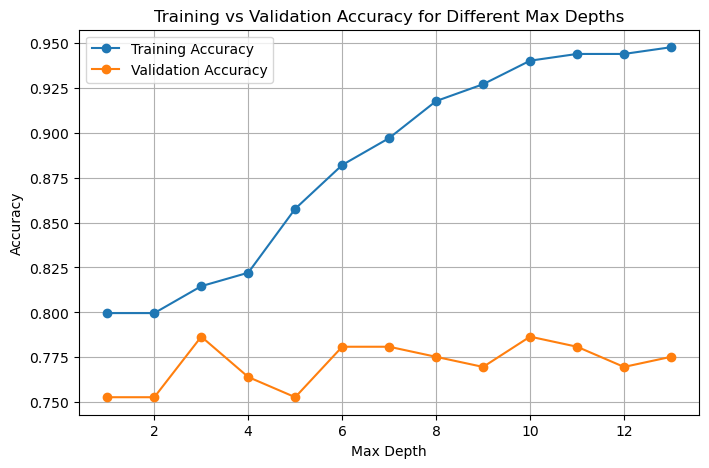

In [33]:
# or by another way of visualize of train vs validate
train_accuracies = []
val_accuracies = []

for x in range(1, 14):
    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    
    acc = tree.score(X_train, y_train)
    acc_val = tree.score(X_validate, y_validate)
    
    train_accuracies.append(acc)
    val_accuracies.append(acc_val)
    
    print(f'With a max depth of {x}, the accuracy for train is {round(acc, 2)}')
    print(f'With a max depth of {x}, the accuracy for validate is {round(acc_val, 2)}')
    print()

# Plotting the accuracy trends after the loop completes
plt.figure(figsize=(8, 5))
plt.plot(range(1, 14), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, 14), val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for Different Max Depths')
plt.legend()
plt.grid(True)
plt.show()


From visualize, max_depth= 3 gives the best model.